In [4]:
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import HTML, display
import math

def function(x, y):
    return -1 * math.exp(-1 * (x**2 + y**2))

def gradient_matrix(x, y):
    return x * 2 * math.exp(-1 * (x**2 + y**2)), y * 2 * math.exp(-1 * (x**2 + y**2))

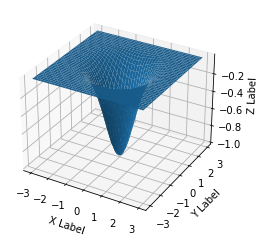

In [5]:
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)

z_array = np.array([function(a, b) for a, b in zip(np.ravel(X), np.ravel(Y))])
Z = z_array.reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
def inverse_square_matrix(a, b, c, d):
    det = a * d - b * c
    return d / det, -1 * b / det, -1 * c / det, a / det

def gradient_minimizer(x, y, search_function):
    iteration_count = 0
    max_iterations = 1000
    
    # We need to iterate over this
    max_value = 2 ** 64
    min_value = 1 / 2 ** 256
    irrelevant_delta = 1 / 2 ** 50
    
    grad_x, grad_y = gradient_matrix(x, y)
    variation_x, variation_y = max_value, max_value

    sum_num_calls = 0
    while (iteration_count < max_iterations 
           and (abs(grad_x) > min_value or abs(grad_y) > min_value)
           and abs(variation_x) > irrelevant_delta or abs(variation_y) > irrelevant_delta):
            #print(iteration_count, grad_x, grad_y, p_x, p_y)
            
            direction_x, direction_y = -1 * grad_x, -1 * grad_y
            step, num_calls = search_function(x, y, direction_x, direction_y)
            sum_num_calls += num_calls
            
            x0, y0 = x, y
            x, y = x + step * direction_x, y + step * direction_y
            variation_x, variation_y = x - x0, y - y0
            #print(x, y, variation_x, variation_y)
            iteration_count = iteration_count + 1
            gradient = gradient_matrix(x, y)
            #print(abs(grad_x) > min_value, abs(grad_y) > min_value, abs(variation_x) > irrelevant_delta, abs(variation_y) > irrelevant_delta)
    #print(x, y, variation_x, variation_y, grad_x, grad_y)
    
    return x, y, iteration_count, sum_num_calls

def armijo_search(x, y, direction_x, direction_y):
    growth = 0.8
    control = 0.25
    dot = lambda grad_x, grad_y, d_x, d_y: grad_x * d_x + grad_x * d_y
    
    grad_x, grad_y = gradient_matrix(x, y)
    num_calls = 0
    step = 1
    #print(function(x + step * direction_x, y + step * direction_y), ">", function(x, y) + control * step * dot(grad_x, grad_y, direction_x, direction_y), function(x + step * direction_x, y + step * direction_y) > function(x, y) + control * step * dot(grad_x, grad_y, direction_x, direction_y))
    while (function(x + step * direction_x, y + step * direction_y)
        > function(x, y) + control * step * dot(grad_x, grad_y, direction_x, direction_y)):
            step *= growth
            num_calls += 1
    
    return step, num_calls

def generate_results(x, y, minimize_function, search_function):
    new_x, new_y, iteration_count, num_calls = minimize_function(x, y, search_function)
    value = function(new_x, new_y)
    return [x, y, iteration_count, num_calls, new_x, new_y, value, -2 - value]

count = 8
points = [[0.3271753038240828, 2.8139051951089726]] + [[random.uniform(-10.0, 10.0), random.uniform(-10.0, 10.0)] for _ in range(count)]

minimizers = [{
    "name": "Gradiente",
    "func": gradient_minimizer
}]
searchers = [{
    "name": "Armijo",
    "func": armijo_search
}]

for minimizer in minimizers:
    for searcher in searchers:
        lines = [["X0", "Y0", "Iter.", "Search Iter.", "X Opt.", "Y Opt.", "Opt. Value", "Error"]]
        lines += [generate_results(point[0], point[1], minimizer["func"], searcher["func"]) for point in points]

        print("Minimizer method", minimizer["name"], " + search method", searcher["name"])
        
        display(HTML('<table><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(val) for val in line)) for line in lines)
        )))